In [6]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import re
import plotly.graph_objects as go
from collections import defaultdict

In [2]:
data = defaultdict(list)
with open("mem_result.txt", "r") as f:
    while f.readable():
        f.readline()
        n = f.readline()
        num = re.match(r"^\[([0-9]{1,2})\]$" ,n).group(1)
        for i in range(4):
            value = np.float(f.readline().strip("\n"))
            data[num].append(value)
        if num == "60":
            break

In [3]:
x = list(map(int, data.keys()))
y = np.array(list(data.values()))

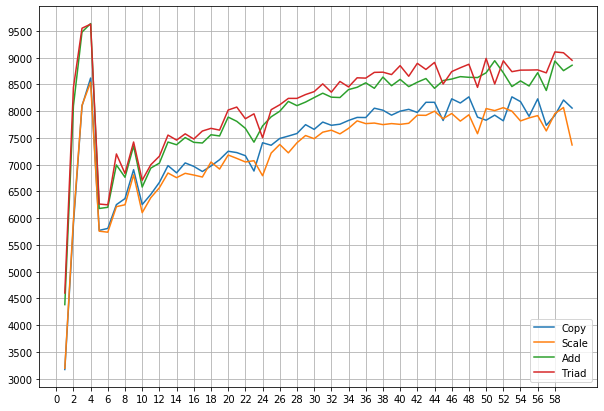

In [4]:
labels=["Copy", "Scale", "Add", "Triad"]
plt.figure(figsize=(10,7))
for i, l in enumerate(labels):
    plt.plot(x,y[:,i], label=l)
plt.legend()
plt.xticks(ticks=np.arange(0, len(data), 2));
plt.yticks(ticks=np.arange(3000, 10_000, 500));
plt.grid()

In [2]:
from json import load
import os

In [4]:
result_path = "../result"
alg_files = os.listdir(result_path)
alg_res_regex = r"^(.*)-T([\d]{1,2})-R([\d]{1,3}).json$"
print(alg_files)

data = dict()

for alg in alg_files:
    di = load(open(os.path.join(result_path, alg), 'r'))
    grps = re.match(alg_res_regex, alg)
    alg_name = grps.group(1)
    thread = int(grps.group(2))
    rounds = grps.group(3)
    
    alg_d = dict()
    data[thread] = dict()

    for k, v in di.items():
        fn, nthr, func = list(map(str.strip, k.split(",")))
        size = int(re.match(r"^data/map/size-(\d{1,}).csv$", fn).group(1))
        if size not in alg_d:
            alg_d[size] = dict()
        alg_d[size][func] = v["nanos"] + (v["secs"]*1e9)
    data[thread][alg_name] = alg_d
data

['scan-T24-R10.json', 'map-T24-R10.json', 'qs-T24-R10.json', 'map-T4-R10.json', 'scan-T20-R10.json', 'sample_sort-T20-R10.json', 'qs-T20-R10.json', 'map-T20-R10.json', 'qs-T4-R10.json', 'sample_sort_par-T24-R10.json', 'scan-T4-R10.json']


{24: {'sample_sort_par': {1048576: {'sample_sort par': 8281805.0},
   134217728: {'sample_sort par': 3212732928.0},
   16777216: {'sample_sort par': 1099718912.0},
   2097152: {'sample_sort par': 37765140.0},
   33554432: {'sample_sort par': 1648528768.0},
   67108864: {'sample_sort par': 2551664896.0},
   8388608: {'sample_sort par': 515698432.0}}},
 4: {'scan': {1048576: {'par_scan': 32112512.0, 'rayon_sum': 66832.0},
   134217728: {'par_scan': 4156685824.0, 'rayon_sum': 38073348.0},
   16777216: {'par_scan': 546843520.0, 'rayon_sum': 5002188.0},
   2097152: {'par_scan': 63163260.0, 'rayon_sum': 160960.0},
   33554432: {'par_scan': 1061152192.0, 'rayon_sum': 9591758.0},
   67108864: {'par_scan': 2117551360.0, 'rayon_sum': 18755234.0},
   8388608: {'par_scan': 269482368.0, 'rayon_sum': 2162274.0}}},
 20: {'map': {1048576: {'half_split_Multiply': 1906208.0,
    'rayon_par_iter_Multiply': 2421605.0,
    'sqrt_n_Multiply': 2617391.0},
   134217728: {'half_split_Multiply': 433280096.0,
  

sample_sort par


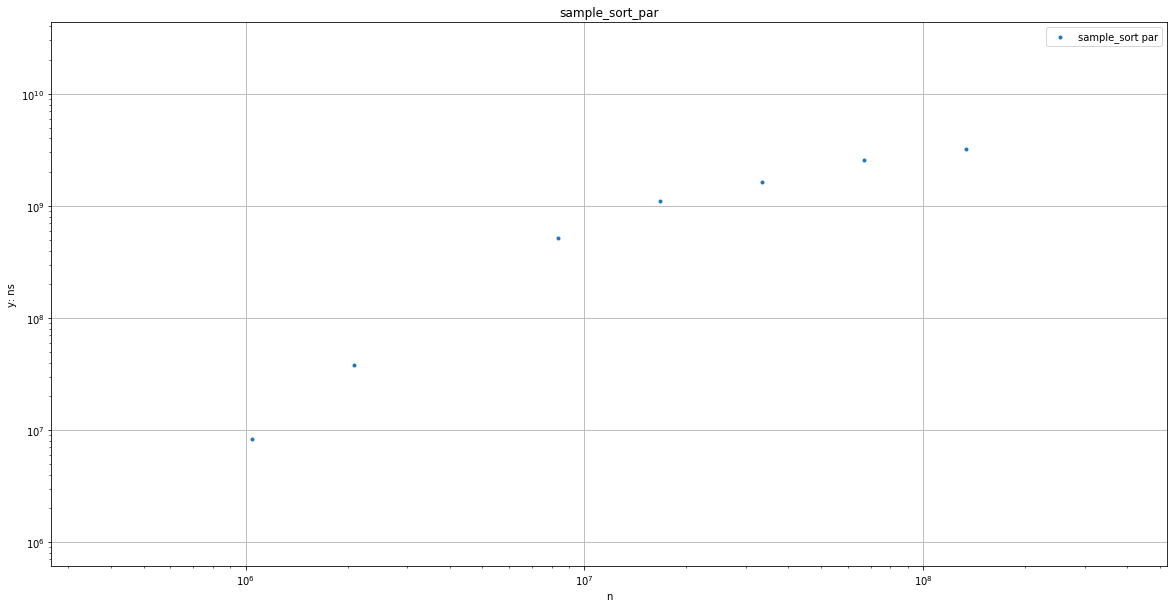

In [5]:
result = dict()
for alg, d in data[24].items():
    result[alg] = dict()
    for size, map_ver in d.items():
        for ver, tm in map_ver.items():
            if ver not in result[alg]:
                result[alg][ver] = {"x":[], "y": []}
            result[alg][ver]["x"].append(size)
            result[alg][ver]["y"].append(tm)

for alg, vers in result.items():
    plt.figure(figsize=(20,10))
    plt.title(alg)
    plt.xlabel("n")
    plt.ylabel("y: ns")
    plt.xscale("log")
    plt.yscale("log")
    for v, pts in vers.items():
        print(v)
        plt.scatter(pts['x'], pts['y'], label=v, marker='.')
    plt.legend()
    plt.grid()
    plt.show()

In [14]:
result = dict()
for tn, items in data.items():
    for alg, d in items.items():
        result[alg] = dict()
        for size, map_ver in d.items():
            for ver, tm in map_ver.items():
                if ver not in result[alg]:
                    result[alg][ver] = {"x":[], "y": [], "z":[]}
                result[alg][ver]["x"].append(size)
                result[alg][ver]["y"].append(tm)
                result[alg][ver]["z"].append(tn)
result


{'sample_sort_par': {'sample_sort par': {'x': [1048576,
    134217728,
    16777216,
    2097152,
    33554432,
    67108864,
    8388608],
   'y': [8281805.0,
    3212732928.0,
    1099718912.0,
    37765140.0,
    1648528768.0,
    2551664896.0,
    515698432.0],
   'z': [24, 24, 24, 24, 24, 24, 24]}},
 'scan': {'par_scan': {'x': [1048576,
    134217728,
    16777216,
    2097152,
    33554432,
    67108864,
    8388608],
   'y': [32112512.0,
    4156685824.0,
    546843520.0,
    63163260.0,
    1061152192.0,
    2117551360.0,
    269482368.0],
   'z': [4, 4, 4, 4, 4, 4, 4]},
  'rayon_sum': {'x': [1048576,
    134217728,
    16777216,
    2097152,
    33554432,
    67108864,
    8388608],
   'y': [66832.0,
    38073348.0,
    5002188.0,
    160960.0,
    9591758.0,
    18755234.0,
    2162274.0],
   'z': [4, 4, 4, 4, 4, 4, 4]}},
 'map': {'half_split_Multiply': {'x': [1048576,
    134217728,
    16777216,
    2097152,
    33554432,
    67108864,
    8388608],
   'y': [1906208.0,
    